In [3]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np

import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.ion()
from PIL import Image
from osgeo import gdal

In [4]:
#recursively look through a directory and create a list of all tif files

def get_tif_files(directory):
    tif_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".tif"):
                tif_files.append(os.path.join(root, file))
    return tif_files

#look through directory and return a list of all subdirectories that start with a certain string
def get_subdirs(directory, startswith):
    subdirs = []
    for root, dirs, files in os.walk(directory):
        for d in dirs:
            if d.startswith(startswith):
                subdirs.append(os.path.join(root, d))
    return subdirs

In [5]:
#function to read in multiband tiff file and return viewable array alongside other bands array
def vis_tif(file_path):
    # read bands
    data = gdal.Open(file_path, gdal.GA_ReadOnly)
    georef = np.array(data.GetGeoTransform())
    bands = [data.GetRasterBand(k + 1).ReadAsArray() for k in range(data.RasterCount)]
    im_ms = np.stack(bands, 2)
    im_ms = im_ms/10000 # TOA scaled to 10000

    #example of separating visible from other bands and returning separately
    r = im_ms[:,:,5]#red
    g = im_ms[:,:,3]#green
    b = im_ms[:,:,1]#blue
            #im_ms[:,:,[2,1,0]]
    cb = im_ms[:,:,0]#coastal blue
    gr53 = im_ms[:,:,2]#green 53
    y = im_ms[:,:,4]#yellow
    veg_red = im_ms[:,:,6]#vegetation red edge
    #nir = im_ms[:,:,7]#nir

    im_vis = np.stack([r,g,b],2)
    im_alt = np.stack([cb,gr53,y,veg_red],2)#,nir],2)
    return im_vis,im_alt


In [2]:
subds = get_subdirs("data", "Ukulhas_2023")
subds

NameError: name 'get_subdirs' is not defined

In [ ]:
tifs = []
for subd in subds:
    tifs.extend(get_tif_files(subd))

# read in tiff and view

In [ ]:
for tif in tifs:
    #fp = tif#'data/Ukulhas_2023-11-01_medium/137f6427-9fb3-4380-a0b6-4766910bb0c4/20231115_052549/SKYWATCH_PLSD_PS_20231115T0525_ALL_Tile_0_0_9765.tif'
    #split path to get filename
    filename = os.path.basename(fp)
    filename = os.path.splitext(filename)[0]


    visible_bands,alt_bands = vis_tif(fp)
    visible_bands = (visible_bands*255).astype(np.uint8)
    visible_bands = Image.fromarray(visible_bands)
    visible_bands.save('D:/Github/CoastSat/data/ukulhas/mr/png/' + filename + '.png')


    #copy the tif file to a new location
    import shutil
    shutil.copy(fp,'D:/Github/CoastSat/data/ukulhas/mr/ms/'+ filename + '.tif')#

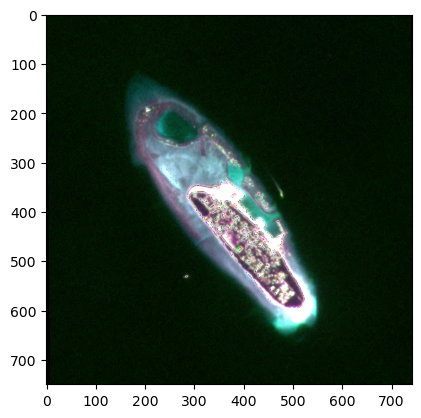

In [25]:
%matplotlib inline
single_tif = 'data/Ukulhas_2023-01-01_medium/45bba2a6-0e36-47d8-b053-c5683e5ac7c6/20230103_043520\SKYWATCH_PLSD_PS_20230103T0435_TC_Tile_0_0_ec9f.tif'
visible_bands,alt_bands = vis_tif(single_tif)
visible_bands = (visible_bands*255).astype(np.uint8)
plt.imsave('D:/Github/CoastSat/to_upsample.jpg', visible_bands)
plt.imshow(visible_bands)